# Hypothesis Testing in Python

## Chapter 2: Two-Sample and ANOVA Tests

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

1. Specify the null and alternative hypothesis
2. Conduct hypothesis test in Python
3. Identify population parameter that is hypothesized about
4. Interpret the results in the context of the original problem
5. Measure evidence against the null hypothesis
6. Determine (standardized) test statistic and corresponding null distribution
7. Make a decision comparing evidence to significance level

In [2]:
late_shipments = pd.read_feather("late_shipments.feather")
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,...,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


In [3]:
late_shipments_yes = late_shipments[late_shipments["late"]=="Yes"].copy()
late_shipments_no = late_shipments[late_shipments["late"]=="No"].copy()

xbar_yes = late_shipments_yes["weight_kilograms"].mean()
xbar_no = late_shipments_no["weight_kilograms"].mean()

s_yes = late_shipments_yes["weight_kilograms"].std()
s_no = late_shipments_no["weight_kilograms"].std()

n_yes = late_shipments_yes["weight_kilograms"].count()
n_no = late_shipments_no["weight_kilograms"].count()

print(xbar_yes, s_yes, n_yes)
print(xbar_no, s_no, n_no)

2715.6721311475408 2544.688210903328 61
1897.7912673056444 3154.039507084167 939


In [4]:
# Calculate the numerator of the test statistic
numerator = (xbar_no - xbar_yes)

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_yes**2/n_yes) + (s_no**2/n_no))

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In this case we will use left-tailed since the alternative hypothesis indicates less than.

If $p \leq \alpha$ then reject $H_0$

In [5]:
alpha = 0.05

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)


0.008432382146249523


In [6]:
sample_dem_data = pd.read_feather("dem_votes_potus_12_16.feather")
sample_dem_data

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546
...,...,...,...,...
495,Wyoming,Uinta,19.065464,14.191263
496,Wyoming,Washakie,20.131846,13.948610
497,Alaska,District 3,33.514582,16.301064
498,Alaska,District 18,61.284271,52.810051


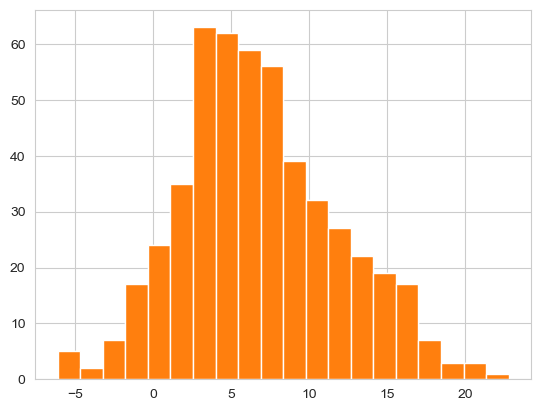

In [7]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
plt.hist(sample_dem_data["diff"], bins=20)
sample_dem_data['diff'].hist(bins=20)
plt.show()

$H_0$: The proportion of democratic votes in 2012 and 2016 were the same.
$H_A$: The proportion of democratic votes in 2012 and 2016 were different.

In [8]:
# Conduct a t-test on diff
test_results = pg.ttest(
    x=sample_dem_data["diff"],
    y=0,
    alternative="two-sided"
)

print(test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  


Since $p < \alpha$, where $\alpha = 0.01$ we will reject $H_0$

In [9]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pg.ttest(
    x=sample_dem_data['dem_percent_12'],
    y=sample_dem_data['dem_percent_16'],
    paired=True,
    alternative="two-sided"
)

# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


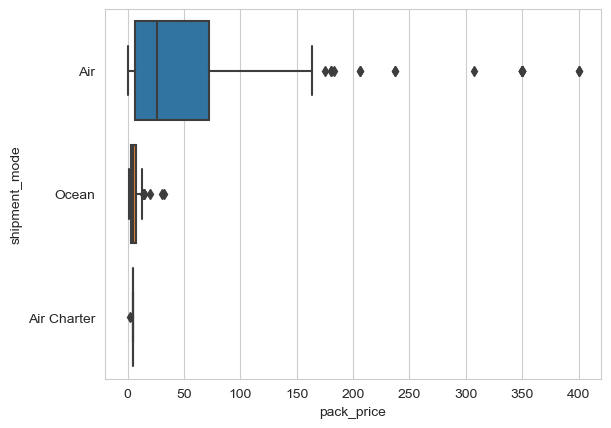

In [10]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()


$H_0$: Pack prices for every category of shipment mode are the same.

$H_A$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

In [11]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pg.anova(
    data=late_shipments,
    dv="pack_price",
    between="shipment_mode"
)

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


In [12]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pg.pairwise_tests(
    data=late_shipments,
    dv="pack_price",
    between="shipment_mode",
    padjust="none"
)

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [13]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pg.pairwise_tests(
    data=late_shipments,
    dv="pack_price",
    between="shipment_mode",
    padjust="bonf"
)

# Print pairwise_results
print(pairwise_results)


        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.
